# Loading on an Infinite Strip - PTV - 4 ordem - Trigonométrico

In [1]:
# Importar biblioteca
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Declarar variáveis
x, z, p, E, v, a , b = symbols('x z p E v a b')
# Declarar funções de aproximação
phi = Matrix([[cos(1*np.pi*x/(2*100))*cos(1*np.pi*z/(2*100)),0],[0,cos(1*np.pi*x/(2*100))*cos(1*np.pi*z/(2*100))],[cos(3*np.pi*x/(2*100))*cos(3*np.pi*z/(2*100)),0],[0,cos(3*np.pi*x/(2*100))*cos(3*np.pi*z/(2*100))],[cos(5*np.pi*x/(2*100))*cos(5*np.pi*z/(2*100)),0],[0,cos(5*np.pi*x/(2*100))*cos(5*np.pi*z/(2*100))],[cos(7*np.pi*x/(2*100))*cos(7*np.pi*z/(2*100)),0],[0,cos(7*np.pi*x/(2*100))*cos(7*np.pi*z/(2*100))]])
phim = Matrix([0,cos(1*np.pi*x/(2*100))*cos(1*np.pi*z/(2*100)),0,cos(3*np.pi*x/(2*100))*cos(3*np.pi*z/(2*100)),0,cos(5*np.pi*x/(2*100))*cos(5*np.pi*z/(2*100)),0,cos(7*np.pi*x/(2*100))*cos(7*np.pi*z/(2*100))])
dphix = diff(phi,x)
dphiz = diff(phi,z)
L=(0.4*10e3)/((1+0.4)*(1-2*0.4))
G=10e3/(2*(1+0.4))
# Número de funções de aproximação
n=8

In [3]:
# Loop para construção de K e F
K=zeros(n,n)
F=zeros(n,1)
for i in range(n):
    if i%2==0:
        F[i]=0
        for j in range(n):
            if j%2==0:
                K[i,j]=integrate(integrate((1/v-1)*L*dphix[i]*dphix[j]+G*dphiz[i]*dphiz[j], (x, -a, a)), (z, 0, a))
            else:
                K[i,j]=integrate(integrate(L*dphix[i]*dphiz[j]+G*dphiz[i]*dphix[j], (x, -a, a)), (z, 0, a))
    else:
        F[i]=integrate(phim[i]*p, (x, -b, b))
        for j in range(n):
            if j%2==0:
                K[i,j]=integrate(integrate(L*dphiz[i]*dphix[j]+G*dphix[i]*dphiz[j], (x, -a, a)), (z, 0, a))
            else:
                K[i,j]=integrate(integrate((1/v-1)*L*dphiz[i]*dphiz[j]+G*dphix[i]*dphix[j], (x, -a, a)), (z, 0, a)) 
                
print('K =')
print(K)
print('F =')
print(F)
print('det K =')
K.det()

K =
Matrix([[-0.000246740110027234*(-14285.7142857143 + 14285.7142857143/v)*(-0.5*a + 31.8309886183791*sin(0.015707963267949*a)*cos(0.015707963267949*a))*(0.5*a + 31.8309886183791*sin(0.015707963267949*a)*cos(0.015707963267949*a)) + 0.000246740110027234*(-14285.7142857143 + 14285.7142857143/v)*(0.5*a - 31.8309886183791*sin(0.015707963267949*a)*cos(0.015707963267949*a))*(0.5*a + 31.8309886183791*sin(0.015707963267949*a)*cos(0.015707963267949*a)) + 2*(0.440607339334346*a + 28.0499344070517*sin(0.015707963267949*a)*cos(0.015707963267949*a))*(0.5*a - 31.8309886183791*sin(0.015707963267949*a)*cos(0.015707963267949*a)), 0, 0, 0, 0.000740220330081702*(-14285.7142857143 + 14285.7142857143/v)*(-23.8732414637843*sin(0.015707963267949*a)*cos(0.0471238898038469*a) + 7.95774715459477*sin(0.0471238898038469*a)*cos(0.015707963267949*a))*(-7.95774715459477*sin(0.015707963267949*a)*cos(0.0471238898038469*a) + 23.8732414637843*sin(0.0471238898038469*a)*cos(0.015707963267949*a)) - 0.000740220330081702*(-

0

In [4]:
# Deletar linhas e colunas nulas
rows_to_delete = [1,2,5,6]
cols_to_delete = [1,2,5,6]
K_aux = np.delete(K, rows_to_delete, axis=0)
K_red = np.delete(K_aux, cols_to_delete, axis=1)
F_red = np.delete(F, rows_to_delete, axis=0)
K_red_sp=Matrix(K_red)
F_red_sp=Matrix(F_red)
print('K_red =')
print(K_red_sp)
print('F_red =')
print(F_red_sp)
print('det K_red =')
K_red_sp.det()

K_red =
Matrix([[-0.000246740110027234*(-14285.7142857143 + 14285.7142857143/v)*(-0.5*a + 31.8309886183791*sin(0.015707963267949*a)*cos(0.015707963267949*a))*(0.5*a + 31.8309886183791*sin(0.015707963267949*a)*cos(0.015707963267949*a)) + 0.000246740110027234*(-14285.7142857143 + 14285.7142857143/v)*(0.5*a - 31.8309886183791*sin(0.015707963267949*a)*cos(0.015707963267949*a))*(0.5*a + 31.8309886183791*sin(0.015707963267949*a)*cos(0.015707963267949*a)) + 2*(0.440607339334346*a + 28.0499344070517*sin(0.015707963267949*a)*cos(0.015707963267949*a))*(0.5*a - 31.8309886183791*sin(0.015707963267949*a)*cos(0.015707963267949*a)), 0, 0.000740220330081702*(-14285.7142857143 + 14285.7142857143/v)*(-23.8732414637843*sin(0.015707963267949*a)*cos(0.0471238898038469*a) + 7.95774715459477*sin(0.0471238898038469*a)*cos(0.015707963267949*a))*(-7.95774715459477*sin(0.015707963267949*a)*cos(0.0471238898038469*a) + 23.8732414637843*sin(0.0471238898038469*a)*cos(0.015707963267949*a)) - 0.000740220330081702*(-14

1.0*(15.7249210254986*a**4*v**2 - 41.9331227346631*a**4*v + 27.955415156442*a**4 - 63730.7044394323*a**2*v**2*sin(0.015707963267949*a)**2*cos(0.015707963267949*a)**2 - 7081.18938215914*a**2*v**2*sin(0.0471238898038469*a)**2*cos(0.0471238898038469*a)**2 + 169948.545171819*a**2*v*sin(0.015707963267949*a)**2*cos(0.015707963267949*a)**2 + 18883.1716857577*a**2*v*sin(0.0471238898038469*a)**2*cos(0.0471238898038469*a)**2 - 113299.030114546*a**2*sin(0.015707963267949*a)**2*cos(0.015707963267949*a)**2 - 12588.7811238385*a**2*sin(0.0471238898038469*a)**2*cos(0.0471238898038469*a)**2 - 9080536.5114796*v**2*sin(0.015707963267949*a)**4*cos(0.0471238898038469*a)**4 + 60536910.0765307*v**2*sin(0.015707963267949*a)**3*sin(0.0471238898038469*a)*cos(0.015707963267949*a)*cos(0.0471238898038469*a)**3 - 90356943.5586736*v**2*sin(0.015707963267949*a)**2*sin(0.0471238898038469*a)**2*cos(0.015707963267949*a)**2*cos(0.0471238898038469*a)**2 + 60536910.0765307*v**2*sin(0.015707963267949*a)*sin(0.04712388980384

In [5]:
# Solução do sistema de equações
c_red=simplify(K_red_sp.subs([(E, 10e3), (v, 0.4), (p, 20), (a, 100), (b, 10)]).inv()*F_red_sp.subs([(E, 10e3), (v, 0.4), (p, 20), (a, 100), (b, 10)]))
print('c_red =')
print(c_red)

c_red =
Matrix([[0], [0.0124944130002734*cos(0.0471238898038469*z) - 4.20799001995327e-35*cos(0.109955742875643*z)], [0], [-5.00284868156444e-35*cos(0.0471238898038469*z) + 0.00116769839116461*cos(0.109955742875643*z)]])


In [6]:
# Calcular u e v
phi_red = np.delete(phi, rows_to_delete, axis=0)
aprox = phi_red.T*c_red
u_aux = np.delete(aprox, [1], axis=0)
v_aux = np.delete(aprox, [0], axis=0)
u_aux2 = Matrix(u_aux)
v_aux2 = Matrix(v_aux)
u_sp = u_aux2.subs([(E, 10e3), (v, 0.4), (p, 20), (a, 100), (b, 10)])
v_sp = v_aux2.subs([(E, 10e3), (v, 0.4), (p, 20), (a, 100), (b, 10)])
uu = np.squeeze(u_aux)
vv = np.squeeze(v_aux)
print('u = ')
print(uu)
print('v = ')
print(vv)

u = 
0
v = 
(-5.00284868156444e-35*cos(0.0471238898038469*z) + 0.00116769839116461*cos(0.109955742875643*z))*cos(0.109955742875643*x)*cos(0.109955742875643*z) + (0.0124944130002734*cos(0.0471238898038469*z) - 4.20799001995327e-35*cos(0.109955742875643*z))*cos(0.0471238898038469*x)*cos(0.0471238898038469*z)


In [7]:
# Calcular Energia Potencial Total
Pi=0.5*integrate(integrate(L*(u_sp.diff(x)+v_sp.diff(z))**2+G*((u_sp.diff(z)+v_sp.diff(x))**2+2*(u_sp.diff(x)**2+v_sp.diff(z)**2)), (z, 0, a)), (x, -a, a))-integrate(p*v_sp, (x,-b, b))
print('Pi = ')
Pi.subs([(E, 10e3), (v, 0.4), (p, 20), (a, 100), (b, 10), (z, 0)])

Pi = 


Matrix([[16.6931575933721]])

## Plotagem

In [8]:
# Definir valor dos parâmetros da placa
E,v,p,a,b=10e3,0.4,20,100,10

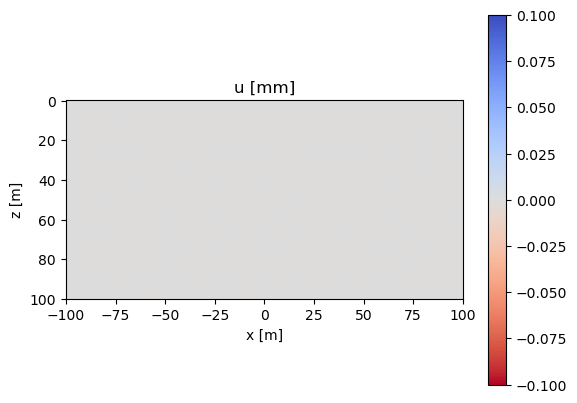

In [9]:
# Criar uma mesh 2D
x = np.linspace(-100, 100, 2000)
z = np.linspace(0, 100, 1000)
xx, zz = np.meshgrid(x, z)

# Plotar o mapa de calor
plt.imshow(0*xx, cmap='coolwarm_r', extent=[x.min(), x.max(), z.min(), z.max()])

# Legenda
plt.colorbar()

# Inverter o eixo y
plt.gca().invert_yaxis()

# Eixos
plt.xlabel('x [m]')
plt.ylabel('z [m]')

# Título
plt.title('u [mm]')

# Plot
plt.show()

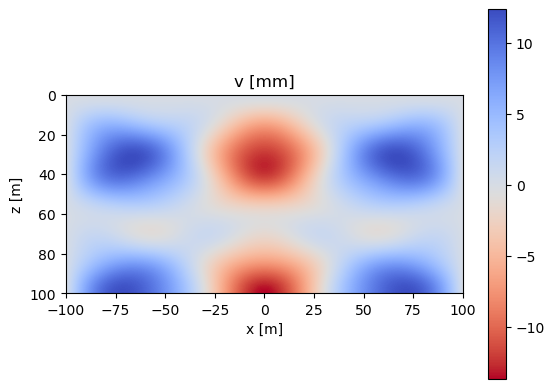

In [11]:
# Criar uma mesh 2D
x = np.linspace(-100, 100, 2000)
z = np.linspace(0, 100, 1000)
xx, zz = np.meshgrid(x, z)

# Plotar o mapa de calor
plt.imshow(((-5.00284868156444e-35*np.cos(0.0471238898038469*zz) + 0.00116769839116461*np.cos(0.109955742875643*zz))*np.cos(0.109955742875643*xx)*np.cos(0.109955742875643*zz) + (0.0124944130002734*np.cos(0.0471238898038469*zz) - 4.20799001995327e-35*np.cos(0.109955742875643*zz))*np.cos(0.0471238898038469*xx)*np.cos(0.0471238898038469*zz))*-1000, cmap='coolwarm_r', extent=[x.min(), x.max(), z.min(), z.max()])

# Legenda
plt.colorbar()

# Inverter o eixo y
plt.gca().invert_yaxis()

# Eixos
plt.xlabel('x [m]')
plt.ylabel('z [m]')

# Título
plt.title('v [mm]')

# Plot
plt.show()